# Tutorial 1

**Linear Algebra I, Vectors**

**[insert your name]**

**Important reminders**: Before starting, click "File -> Save a copy in Drive". Produce a pdf for submission by "File -> Print" and then choose "Save to PDF".

To complete this tutorial, you should have watched Video 1.1: Vectors and Video 1.2: Vector operations, and Video 1.3: Linear combinations, span, and basis vectors

**Learning objectives**
* Review and use vector properties and operations such as vector length, scalar multiplication, and vector addition
* Gain a better understanding of the dot product
* Think about optimal stimuli in the context of linear algebra
* Gain more intuition about correlation coefficients


In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import ipywidgets as widgets

# Plotting parameters
matplotlib.rcParams.update({'font.size': 22})

##  Hidden functions


In [ ]:
# @title Hidden functions

def generate_unit_vec(dim=4):
  """Generate random unit vector with only positive values. Please note that this
  is not at all a principled correct way of doing this (not truly random)

  Args:
    dim (scalar): dimension of the unit vector

  """
  vec = -1* np.ones(dim,)
  while np.any(vec<0):
    vec = np.random.randn(4,)
  unit_vec = vec/np.linalg.norm(vec)
  return unit_vec

def plot_responses_vs_angles(responses, angles):
  """ Plot neural responses as a function of the angle between the pixel vector
  and weight vector.

  Args:
    responses (ndarray): the responses of the neuron to each image (n_images x 1)
    angles (ndarray): the corresponding angle of each image to the weight vector (n_images x 1)

  """

  fig, ax = plt.subplots(1, 1, figsize=(10,10))
  ax.plot(angles, responses, 'o', color = '#0DD3C4')
  ax.set(xlabel='Angle (degrees)', ylabel='Neural response')

# Coding tips

We will mostly use numpy in this course, especially for the linear algebra section. We can use 1D numpy arrays for vectors: for example we could write $\bar{x}$ = [4, 5] as `x = np.array([4, 5])`.



In [ ]:
# Defining vectors
x = np.array([4, 5])
y = np.array([1, 2])

# Length of a vector
length_of_x = np.linalg.norm(x)

# Scalar multiplication
scalar_multiplied_x = 5*x

# Vector addition
summed_vectors = x + y

# Dot product
dot_prod = np.dot(x, y)

# Exercise 1: Vector addition & scalar multiplication

In the following demo, we will demonstrate a **linear combination** of two vectors, $\mathbf{x}$ and $\mathbf{y}$ (where we multiply each vector by a scalar value and multiply):

$$\mathbf{z} = a\mathbf{x} + b\mathbf{y}$$

where $\mathbf{x}$ and $\mathbf{y}$ are vectors, while $a$ and $b$ are scalars. Specifically, $\mathbf{x} = \begin{bmatrix}3 \\ 1 \\\end{bmatrix}$ and $\mathbf{y} = \begin{bmatrix}-1 \\ 2 \\\end{bmatrix}$.


You will play with the scalar multiples $a$ and $b$ to visualize both scalar multiplication and vector addition. Think and talk through the following questions:


1.   How does $a\mathbf{x}$ compare to $\mathbf{x}$ when $a$ is negative?
2.   How does $a\mathbf{x}$ compare to $\mathbf{x}$ when $a$ is a fraction?
3.  Can you get $\mathbf{z}$ to point to anywhere in the 2D space with combinations of $a$ and $b$?
4.  Would this be the case no matter what $\mathbf{x}$ and $\mathbf{y}$ are, as long as they are both 2D vectors?

*YOUR ANSWERS HERE*

 Make sure you execute this cell to enable the widget! Move the sliders for “a” and “b”. After releasing the slider, be patient for a couple of seconds to see the desired change.


In [ ]:
#@markdown Make sure you execute this cell to enable the widget! Move the sliders for “a” and “b”. After releasing the slider, be patient for a couple of seconds to see the desired change.


def plot_arrows(x, y, a_times_x, b_times_y):
  fig, ax = plt.subplots(figsize=(10, 7))

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')

  ax.set_aspect('equal', adjustable='box')
  ax.set(xlim = [-10, 10], ylim = [-10, 10], xticks = np.arange(-10, 10), yticks = np.arange(-10, 10), xticklabels = [], yticklabels = [])

  ax.grid(alpha=.4)

  z = a_times_x + b_times_y
  z_arr = ax.arrow(0, 0, z[0], z[1], width=.08, color='k', length_includes_head = True);

  x_orig, = ax.plot([0, x[0]], [0, x[1]], '--', color='#648FFF')
  y_orig, = ax.plot([0, y[0]], [0, y[1]], '--',  color='#DC267F')

  ax_arr = ax.arrow(0, 0, a_times_x[0], a_times_x[1], width=.08, color='#648FFF', length_includes_head = True);
  by_arr = ax.arrow(0, 0, b_times_y[0], b_times_y[1], width=.08, color='#DC267F', length_includes_head = True);

  ax.plot([a_times_x[0], z[0]], [a_times_x[1], z[1]], '--k')
  ax.plot([b_times_y[0], z[0]], [b_times_y[1], z[1]], '--k')


  leg = ax.legend([x_orig, y_orig, ax_arr, by_arr, z_arr], [r"$\mathbf{x}$", r"$\mathbf{y}$", r"$a\mathbf{x}$", r"$b\mathbf{y}$", r"$\mathbf{z} = a\mathbf{x} + b\mathbf{y}$"], handlelength = 2, fontsize = 25, loc = 'center left', bbox_to_anchor=(1.05, .5))
  for handle, label in zip(leg.legendHandles, leg.texts):
      try:
          label.set_color(handle.get_facecolor())
      except:
          label.set_color(handle.get_color())
      #handle.set_visible(False)

@widgets.interact(a = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1), b = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1))
def plot_linear_combination(a, b):
  x = np.array([3, 1])
  y = np.array([-1, 2])

  plot_arrows(x, y, a*x, b*y)

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=-2.0), FloatSlider(value=1.0, descr…

# Exercise 2: Figuring out a basis

Let's say we are looking at the firing rates of 3 neurons. We can represent their activity in a 3D plot, as below. It turns out that due to their tightly-linked interactions, they always fire in such a way that the point in 3D space falls along a 2D plane (that passes through the origin). Basically, every single data point we record of the firing rates of the 3 neurons falls on that plane. This is represented by the blue plane in the figure below. This 2D plane is a subspace of all of 3-D space (R3).

A) How many basis vectors would you need for the 2D plane? How many components would each basic vector have?

B) How many numbers would you need to be able to fully describe the state of the 3 neuron population at a given time?


*YOUR ANSWER HERE*

 Execute this cell to see figure


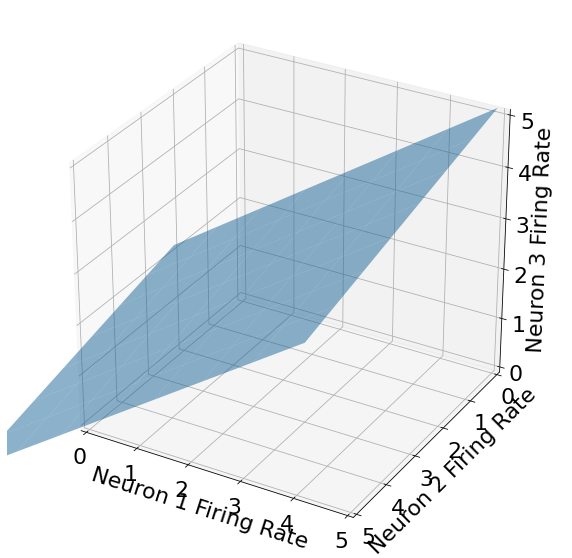

In [ ]:
# @markdown Execute this cell to see figure

fig = plt.figure(figsize = (10, 10))

# add axes
ax = fig.add_subplot(111,projection='3d')

xx, yy = np.meshgrid(range(-4, 4), range(-4, 4))
z = .7*xx + -.2*yy

# plot the plane
ax.plot_surface(xx, yy, z, alpha=0.5)

ax.set(xlim = [0, 5], ylim = [5, 0], zlim = [0, 5], xlabel = 'Neuron 1 Firing Rate',  ylabel = 'Neuron 2 Firing Rate', zlabel = 'Neuron 3 Firing Rate');
#ax.invert_xaxis()


# Exercise 3: Determing dependence

Let's say we have four vectors:

$$ \mathbf{a} = \begin{bmatrix}
    4 \\ 2 \\ 0
\end{bmatrix},  \mathbf{b} = \begin{bmatrix}
    1 \\ 0 \\ 3,
\end{bmatrix}, \mathbf{c} = \begin{bmatrix}
    5 \\ 2 \\ 3
\end{bmatrix}, \mathbf{d} = \begin{bmatrix}
    3 \\ 3 \\ 2
\end{bmatrix}$$

Check out this visualization prepared by Oğul Can Yurdakul to better see the vectors: https://www.geogebra.org/3d/hherq78z!



## A) Linear independence vs dependence
Are these vectors linearly independent or dependent? Why?


**Your text answer here**

## B) Span

i) What is $Span\{\bar{a}, \bar{b}, \bar{c}, \bar{d}\}$?

ii) What is $Span\{\bar{a}, \bar{b}, \bar{c}\}$?

iii) What is $Span\{\bar{a}\}$?

**Your text/math answer here**

## C) Basis

Can you make a basis for $R^3$ based on the above vectors? What is it?

**Your text answer here**

# Exercise 4: Dot product geometrical properties

In this exercise, we will explore and prove the relationship between the dot product of two vectors and the angle between them.



### A) Interactive demo

First, use the following interactive demo to change the dot product of two vectors and see what happens to them (under the constraint that each vector stays the same length).


#### 


 Make sure you execute this cell to enable the widget!


In [ ]:
#@title

#@markdown Make sure you execute this cell to enable the widget!

def solve_equations(dot_prod, x = [4, 1], norm_x = np.sqrt(17), norm_y = 3):
  i = 0 if dot_prod < 0 else 1
  y1 = np.roots([17, -8*dot_prod, dot_prod**2-9])[i]
  y2 = dot_prod - 4*y1
  y = [y1, y2]
  return y

def plot_arrows(x, y):
  fig, ax = plt.subplots(figsize=(7, 7))

  ax.axhline(linewidth=1, color='k') #adds thick red line @ y=0
  ax.axvline(linewidth=1, color='k')
  #ax.grid()
  ax.set_xlim([-6, 6])
  ax.set_ylim([-6, 6])
  ax.axis('Off')


  ax.arrow(0, 0, x[0], x[1], width=.08, color='#01DFD7');
  ax.arrow(0, 0, y[0], y[1], width=.08, color='#0080FF');


@widgets.interact(dot_prod=widgets.FloatSlider(value=1.0, min=-12.3, max=12.3, step=0.1))
def plot_data_estimate(dot_prod):
  y = solve_equations(dot_prod)
  plot_arrows([4, 1], y)


interactive(children=(FloatSlider(value=1.0, description='dot_prod', max=12.3, min=-12.3), Output()), _dom_cla…

i) Does the angle between vectors increase or decrease as the dot product increases?

ii) Does it seem like anything is special about a dot product of 0?


*YOUR ANSWERS HERE*

It turns out that there is a direct relationship between the dot product of two vecors and the angle between them. **The dot product is equal to the length of vector 1 multiplied by the length of vector 2 multiplied by the cosine of the angle**:

$$ \bar{x} \cdot \bar{y} =  ||\bar{x}|| ||\bar{y}|| cos(\theta) $$


### B) (Optional) Proof of relationship

We can work through a guided proof of this relationship - our first proof! Note that this is optional: move on and return to this if you have the time.

![picture](https://drive.google.com/uc?export=view&id=1Lxj0dY_8CpgMhR_SSeRuQdO6-AYpwgj6)


i) Start by using the law of cosines to write out a formula for $||\bar{a}||^2$

ii) Next, figure out what $||\bar{a}||$ equals in terms of $\bar{x}$ and $\bar{y}$ (hint: think about vector operations/stacking vectors)

iii) Write $||\bar{a}||^2$ in terms of a dot product. Substitute in the definition of $||\bar{a}||$ from ii and expand.

iv) Equate the formulas for $||\bar{a}||^2$ from i and iii and rearrange to solve for the dot product of $\bar{x}$ and $\bar{y}$. You should get the equation above!


# Exercise 5: Neural stimuli

Let's say that we are modeling the response of an LGN neuron with four presynaptic retinal neurons.  We are using a simple model in which the response of the LGN neuron corresponds to the weighted sum of the activities of the retinal neurons. Specifically, the weight from pixel 1 is 2, the weight from pixel 2 is 4, the weight from pixel 3 is 1, and the weight from pixel 4 is 5.

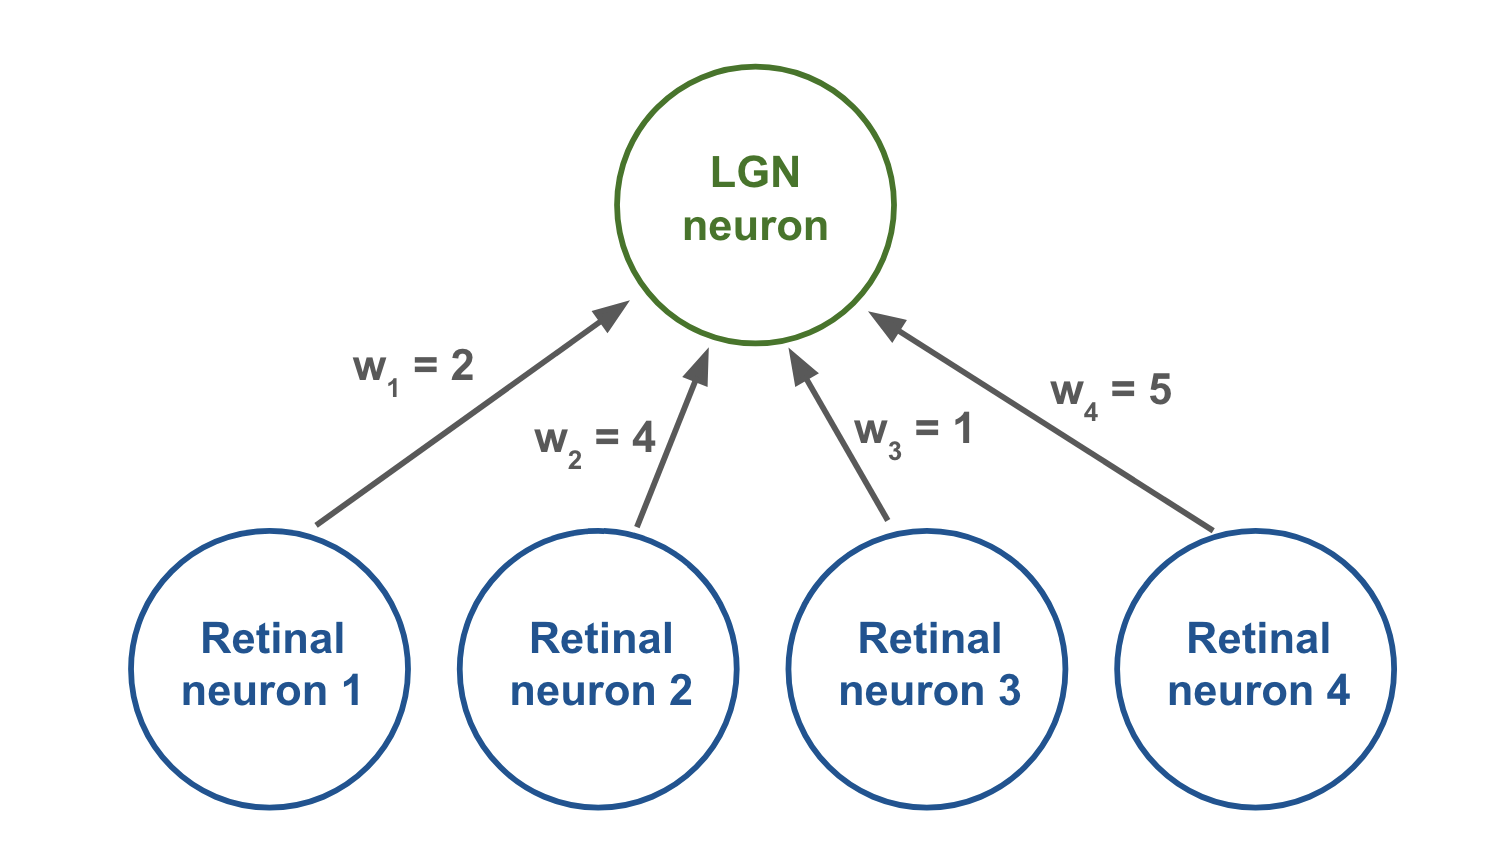


How could we compute the optimal pattern of retinal activities to maximize the response of the LGN neuron, given the constraint that it must be a unit vector?

## A) Write out a formula for the optimal retinal activities






Write your formula here

## B) Compute the optimal retinal activities below

In [ ]:
weights = np.array([2, 4, 1, 5])

optimal_retinal_activities = ...

## C) Get the response of the LGN neuron to the optimal retinal activities using code